In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Path to the folder of images
database_path = '/home/dimitribouche/Bureau/ENSAE/CompressedSensing/CroppedYale'

In [16]:
def read_pgm(pgmf):
    """
    Create a numpy array from a .pgm image file
    
    Args:
        pgmf (file) : a .pgm file opened in python
    Returns:
        numpy.ndarray. The .pgm file as a 2d numpy array
    """
    # Make sure that 
    assert pgmf.readline() == 'P5\n'
    #print(pgmf.readline().split())
    (width, height) = [int(i) for i in pgmf.readline().split()]
    depth = int(pgmf.readline())
    assert depth <= 255

    image = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(pgmf.read(1)))
        image.append(row)
    return np.array(image)


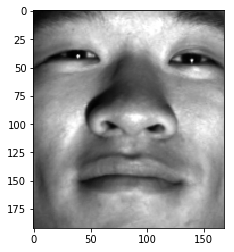

In [18]:
# Test of the read_pgm function on a given image
testfile = open(database_path + '/yaleB13/yaleB13_P00A-010E-20.pgm', 'rb')
testimage = read_pgm(testfile)

# Show the image
plt.imshow(testimage, cmap="gray")

In [19]:
def load_database(path, flatten=True):
    """
    Load the face database from computer
    
    Args:
        path (str): the folder containing the 'CroppedYale' folder
        flatten (bool): Should images be flattened ?
    
    Returns:
        list. A list of list of numpy array. Index of first list is for the individual, 
        index of the second list is the index of the image of the individual
    """
    database = []
    count = 0
    # Each folder contains the pictures for a given individual
    # We loop over folders
    for foldername in os.listdir(path):
        # Create empty container for the images of the individual
        database.append([])
        # Loop over images
        for filename in os.listdir(path + '/' + foldername):
            # Load only images files
            if filename.endswith(".pgm"):
                # Open file
                im = open(path + '/' + foldername + '/' + filename, 'rb')
                # Convert to numpy array, jump file is conversion is not a success
                try :
                    im_np = read_pgm(im)
                except ValueError :
                    # Skip the file "ambient" which are pictures of the background of the faces, unecessary in our case
                    continue
                # Append the new image to the list of images of the individual
                if flatten:
                    database[count].append(im_np.flatten())
                else:
                    database[count].append(im_np)
        count += 1
    return database

In [21]:
# Load the Yale B extended database using our loader
data = load_database(database_path, flatten=False)

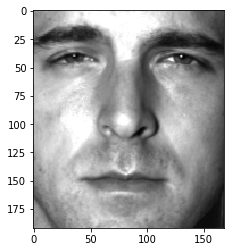

In [65]:
# Test : show a face in the database
# The index states that this is the 9th image for the 7th individual
plt.imshow(data[7][9], cmap="gray")

In [22]:
def divide_learn_test(faces_data, learn_slice=0.5):
    """
    Divide the faces database into a learn set and a test set
    
    Args : 
        faces_data (list) : The database in the format of output from load_database function
        learn_slice (float) : How much of the database should be used for learning ? (0.5 : half)
    
    Returns :
        tuple. A tuple of list, the learn set and the test set
    """
    learn_data = []
    test_data = []
    for person in range(0, len(faces_data)):
        n_images = len(faces_data[person])
        split_index = int(learn_slice * n_images)
        learn_data.append(faces_data[person][0: split_index])
        test_data.append(faces_data[person][split_index: ])
    return learn_data, test_data